<a href="https://colab.research.google.com/github/MN-21/1/blob/main/p3_MLP_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras import regularizers
import os
import math

In [2]:
housing=fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
x_train, x_test, y_train, y_test= train_test_split(housing.data,housing.target,test_size=0.25)
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [4]:
x_train.shape, x_test.shape

((15480, 8), (5160, 8))

In [5]:
np.random.seed(21)
tf.random.set_seed(21)

In [6]:
model=keras.models.Sequential([
                               keras.layers.Dense(units=30, activation='relu',input_shape=x_train.shape[1:]),
                               keras.layers.Dense(1)])


model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=0.02),
              metrics=['mean_squared_error'])


In [7]:
hist=model.fit(x_train, y_train, epochs=3,validation_split=0.2)

Epoch 1/3
387/387 [==============================] - 2s 4ms/step - loss: 1.1830 - mean_squared_error: 1.1830 - val_loss: 0.6803 - val_mean_squared_error: 0.6803
Epoch 2/3
387/387 [==============================] - 1s 3ms/step - loss: 0.4856 - mean_squared_error: 0.4856 - val_loss: 0.4930 - val_mean_squared_error: 0.4930
Epoch 3/3
387/387 [==============================] - 2s 4ms/step - loss: 0.4264 - mean_squared_error: 0.4264 - val_loss: 0.4482 - val_mean_squared_error: 0.4482


In [8]:
hist.history

{'loss': [1.1829830408096313, 0.4855710566043854, 0.4264106750488281],
 'mean_squared_error': [1.1829830408096313,
  0.4855710566043854,
  0.4264106750488281],
 'val_loss': [0.680327832698822, 0.49304676055908203, 0.44817212224006653],
 'val_mean_squared_error': [0.680327832698822,
  0.49304676055908203,
  0.44817212224006653]}

In [9]:
model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4273 - mean_squared_error: 0.4273


[0.42728665471076965, 0.42728665471076965]

In [10]:
model.predict(x_test[21:22])

array([[1.7423335]], dtype=float32)

In [11]:
y_test[21:22]

array([1.778])

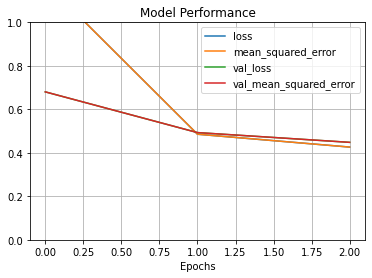

In [12]:
df=pd.DataFrame(hist.history)
df.plot()
plt.xlabel('Epochs')
plt.title('Model Performance')
plt.ylim((0,1))
plt.grid(True)

In [19]:
model.save('p3.MLP.california_housing.h5')
model=keras.models.load_model('p3.MLP.california_housing.h5')

model.save_weights('p3.MLP_wieghts.ckpt')
